# Notebook de exploração

Link para os dados no Kaggle: https://www.kaggle.com/gamersclub/brazilian-csgo-plataform-dataset-by-gamers-club

A ideia desse notebook é explorar o que temos nos dados, verificamos como podemos contar algumas histórias com os dados e, provavelmente, gerará um post no Medium. Basta esperar :) 

## 0. Pacotes úteis inicialmente

In [63]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

---

Setando os diretórios que iremos trazer e exportar os dados:

In [2]:
data_path = '../data/'
output_path = '../output/'

dirs = os.listdir(data_path)

for file in dirs:
    print(file)

tb_players.csv
tb_medalha.csv
tb_lobby_stats_player.csv
tb_players_medalha.csv


---

Verificamos que os dados que temos são os acima. Agora vamos baixar um por um. Como a preguiça de escrever um loop nesse momento é maior que tudo, vamos manualmente baixar de  um por um.

## 1. Baixando os dados

In [3]:
players = pd.read_csv(filepath_or_buffer = data_path + 'tb_players.csv')
medalha = pd.read_csv(filepath_or_buffer = data_path + 'tb_medalha.csv')
stats_players = pd.read_csv(filepath_or_buffer = data_path + 'tb_lobby_stats_player.csv')
players_medalha = pd.read_csv(filepath_or_buffer = data_path + 'tb_players_medalha.csv')

## 2. Explorando cada um dos datasets

### 2.1. Players: Cadastro dos jogadores na plataforma da GC

1. idPlayer: ID
2. flFacebook: Possui vínculo da conta da GC com o Facebook (0 ou 1)
3. flTwitter: Possui vínculo da conta da GC com o Twitter (0 ou 1)
4. flTwitter: Possui vínculo da conta da GC com a Twitch (0 ou 1)
5. descCountry: País de origem do jogador
6. dtBirth: Data de aniversário
7. dtRegistration: Data de registro na plataforma da GC

In [4]:
players.head()

,idPlayer,flFacebook,flTwitter,flTwitch,descCountry,dtBirth,dtRegistration
0,1,0,0,0,cl,NaN,2021-03-19 21:31:39
1,2,0,0,0,br,NaN,2020-05-06 19:28:29
2,3,0,0,0,br,NaN,2020-01-28 13:00:38
3,4,0,0,0,br,NaN,2017-05-31 16:13:51
4,5,0,0,0,ar,NaN,2021-02-08 11:57:21


In [5]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2716 entries, 0 to 2715
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   idPlayer        2716 non-null   int64 
 1   flFacebook      2716 non-null   int64 
 2   flTwitter       2716 non-null   int64 
 3   flTwitch        2716 non-null   int64 
 4   descCountry     2716 non-null   object
 5   dtBirth         2008 non-null   object
 6   dtRegistration  2716 non-null   object
dtypes: int64(4), object(3)
memory usage: 148.7+ KB


--- 

Vamos criar duas funções para mudar o tipo das variáveis `descCountry` (object -> string) e `dtBirth` e `dtRegistration` (object -> Datetime)

In [6]:
def changeColumnTypeToString(df, cols):
    
    df1 = df.copy()
    
    df1[cols] = df1[cols].astype('str')
    
    return df1

def changeColumnTypeToDatetime(df, cols):
    
    df1 = df.copy()
    
    df1[cols] = df1[cols].astype('datetime64[ns]')
    
    return df1

def extractFeaturesFromDateVar(df, col):
    
    from datetime import datetime

    df1 = df.copy()

    df1[col + 'Date'] = df[col].dt.date
    df1[col + 'Year'] = df[col].dt.year
    df1[col + 'Month'] = df[col].dt.month
    df1[col + 'Day'] = df[col].dt.day
    df1[col + 'Hour'] = df[col].dt.hour
    df1[col + 'Minute'] = df[col].dt.minute
    df1[col + 'Seconds'] = df[col].dt.second

    return df1

In [7]:
players1 = players\
.pipe(changeColumnTypeToString, cols = 'descCountry')\
.pipe(changeColumnTypeToDatetime, cols = ['dtBirth', 'dtRegistration'])

players1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2716 entries, 0 to 2715
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   idPlayer        2716 non-null   int64         
 1   flFacebook      2716 non-null   int64         
 2   flTwitter       2716 non-null   int64         
 3   flTwitch        2716 non-null   int64         
 4   descCountry     2716 non-null   object        
 5   dtBirth         2008 non-null   datetime64[ns]
 6   dtRegistration  2716 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(4), object(1)
memory usage: 148.7+ KB


---

Agora que temos tipos de colunas um pouco mais adequadas para as futuras análises, vamos fazer alguns gráficos exploratórios:

In [18]:
#---- Por algum motivo, o plot não fica formatado com o layout certinho

categorical_cols = ['flFacebook', 'flTwitter', 'flTwitch', 'descCountry']

# def plotCountVariables(df, cols):
    
#     plt.figure(figsize = (45, 4))

#     for i, col in enumerate(cols):
#         ax = plt.subplot(1, len(col), i+1)
#         sns.countplot(data = players1, x = col, ax = ax)
#         ax.set_ylabel('')
#         ax.set_xlabel('')

# plotCountVariables(df = players1, cols = categorical_cols)

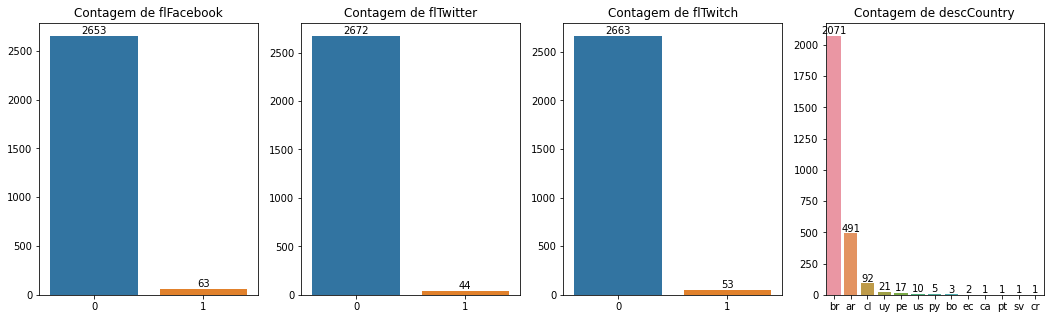

In [9]:
plt.figure(figsize=(18,5))

for i, col in enumerate(categorical_cols):
    ax = plt.subplot(1, len(categorical_cols), i+1)
    sns.countplot(data = players1, x = col, ax = ax, order = players[col].value_counts(ascending = False).index)
    ax.set_title(f'Contagem de {col}')
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.bar_label(container = ax.containers[0])

--- 

Pode-se notar que a grande maioria dos Players da GC não estão conectados às outras plataformas, Facebook, Twitter e/ou Twitch. 

Quando olhamos os países a quais os Players pertencem, majoritariamente temos o Brasil como sendo o principal, logo em seguida temos a Argentina e o Chile.

In [20]:
players1.head()

,idPlayer,flFacebook,flTwitter,flTwitch,descCountry,dtBirth,dtRegistration,cont
0,1,0,0,0,cl,NaT,2021-03-19 21:31:39,1
1,2,0,0,0,br,NaT,2020-05-06 19:28:29,1
2,3,0,0,0,br,NaT,2020-01-28 13:00:38,1
3,4,0,0,0,br,NaT,2017-05-31 16:13:51,1
4,5,0,0,0,ar,NaT,2021-02-08 11:57:21,1


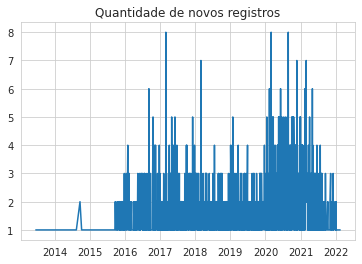

In [66]:
players1['cont'] = 1

dfAggDateByDay = players1\
.pipe(extractFeaturesFromDateVar, col = 'dtRegistration')\
.groupby('dtRegistrationDate')\
.agg(\
    {
    'cont':sum
    }
    )

p = sns.lineplot(data = dfAggDate, x = 'dtRegistrationDate', y = 'cont')
# _ = _.set(title = 'Quantidade de registros')
_ = p.set(xlabel = None, ylabel = None, title = 'Quantidade de novos registros')

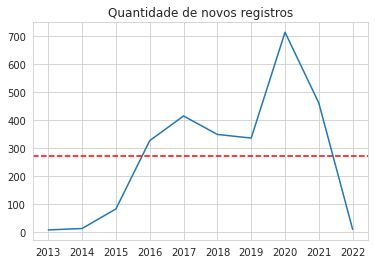

In [107]:
dfAggDateByYear = players1\
.pipe(extractFeaturesFromDateVar, col = 'dtRegistration')\
.groupby('dtRegistrationYear')\
.agg(\
    {
    'cont':sum
    }
    )

yearsFromPlayers = dfAggDateByYear\
.reset_index(level = 0)\
['dtRegistrationYear'].tolist()

p = sns.lineplot(data = dfAggDateByYear, x = 'dtRegistrationYear', y = 'cont')
p.set(xlabel = None, ylabel = None, title = 'Quantidade de novos registros')
p.axhline(y = dfAggDateByYear['cont'].mean(), color = 'red', linestyle = '--')
_ = plt.xticks(yearsFromPlayers)

A GC começou a ter uma quantidade considerada de novos jogadores registrados a partir de 2015, onde houve um aumento de 3x o número de players cadastrados, de 2015 para 2016. Em 2020 a GC atingiu seu ápice de jogadores cadastrados na série histórica e em 2021 houve uma queda em relação ao seu ano mais forte, mas ainda assim está acima da média.

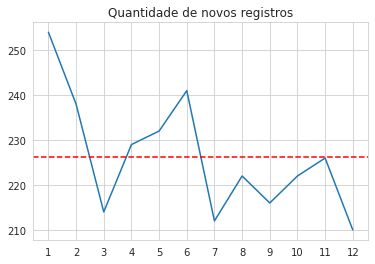

In [108]:
dfAggDateByMonth = players1\
.pipe(extractFeaturesFromDateVar, col = 'dtRegistration')\
.groupby('dtRegistrationMonth')\
.agg(\
    {
    'cont':sum
    }
    )

monthsFromPlayers = dfAggDateByMonth\
.reset_index(level = 0)\
['dtRegistrationMonth'].tolist()

p = sns.lineplot(data = dfAggDateByMonth, x = 'dtRegistrationMonth', y = 'cont')
p.set(xlabel = None, ylabel = None, title = 'Quantidade de novos registros')
p.axhline(y = dfAggDateByMonth['cont'].mean(), color = 'red', linestyle = '--')
_ = plt.xticks(monthsFromPlayers)

**Hipótese**: Janeiro (o que fazem para sempre terem uma grande quantidade de registros na plataforma)

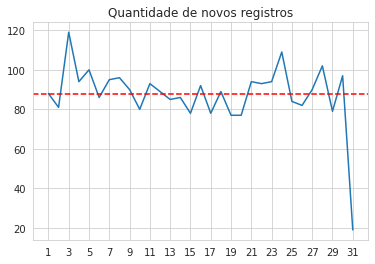

In [116]:
dfAggDateByDay = players1\
.pipe(extractFeaturesFromDateVar, col = 'dtRegistration')\
.groupby('dtRegistrationDay')\
.agg(\
    {
    'cont':sum
    }
    )

daysFromPlayers = list(range(1, 32, 2))

p = sns.lineplot(data = dfAggDateByDay, x = 'dtRegistrationDay', y = 'cont')
p.set(xlabel = None, ylabel = None, title = 'Quantidade de novos registros')
p.axhline(y = dfAggDateByDay['cont'].mean(), color = 'red', linestyle = '--')
_ = plt.xticks(daysFromPlayers)

- Sem sazonalidade a nível dia

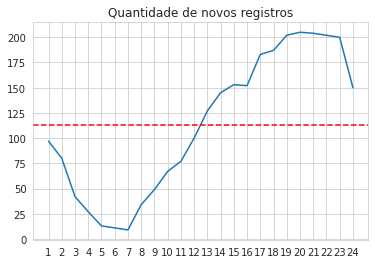

In [142]:
def replaceChain(df, col, old_cat, new_cat):
    
    df1 = df.copy()
    
    df1[col] = df1[col].replace([old_cat],new_cat)
    
    return df1
    

dfAggDateByHour = players1\
.pipe(extractFeaturesFromDateVar, col = 'dtRegistration')\
.groupby('dtRegistrationHour')\
.agg(\
    {
    'cont':sum
    }
    )\
.reset_index(level = 0)\
.pipe(replaceChain, col = 'dtRegistrationHour', old_cat = 0, new_cat = 24)\
.sort_values(by = 'dtRegistrationHour', ascending = True)

minutesFromPlayers = list(range(1, 25, 1))

p = sns.lineplot(data = dfAggDateByHour, x = 'dtRegistrationHour', y = 'cont')
p.set(xlabel = None, ylabel = None, title = 'Quantidade de novos registros')
p.axhline(y = dfAggDateByHour['cont'].mean(), color = 'red', linestyle = '--')
_ = plt.xticks(minutesFromPlayers)

- Entre 1 e 7 da manhã decrescimento na quantidade de novos registros
- 7 às 19hrs temos um crescimento esperado dado a atividade do dia-a-dia
- Pico de novos registros em 4 horas seguidas: 19 até 22hrs
- 23 e 24: Queda "esperada"

### 2.2. Medalhas: Títulos a partir de um determinado status

Exemplo: Se um jogador matou outros jogadores com muitos headshots (tiros na cabeça dão mais dano do que no corpo), ele ganha uma medalha falando que ele é um **Caçador de Cabeças**.